<a href="https://colab.research.google.com/github/SeoMinJong/1day-1study/blob/master/credit_my_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터를 가져와서 기본적인 설정과 결측치 제거 및 column들 데이터 파악

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option("precision",2) # precision 소숫점 자리수를 두 자리까지만 출력하는 pandas option

In [4]:
df = pd.read_csv('C:/Users/SeoMinJong/github/1day1study/data_credit.csv')

In [5]:
df.head(3)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [7]:
# 결측치가 있다. 결측치가 얼마나 있는지 파악해봐야 한다.
null_df = df.isnull()
null_df.sum()
# 결측치 확인 결과 installments만 결측치가 있는 것으로 판별

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [8]:
# null값을 제외한 다른 값들은 어떤 것이 있고 얼마나 있는지 확인할 수 있다.
df.installments.value_counts()

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64

In [9]:
# df에서 null값을 fillna를 사용해서 결측치를 1로 대체해준다.
# df에서 null값이 있는 colunm은 installments를 가져와서 그대로 installments에 넣어줘서 결측치를 제거해 줬다.
# 그 후 installments의 개수를 알기 위해 value_counts를 사용해서 총 개수들을 알수있다.
df.installments = df.installments.fillna(value=1)
df.installments.value_counts()

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

In [10]:
# data와 time을 그대로 추출해서 쓰기 어렵기 때문에 data에서 month와 time에서 hour을 뽑아서 새로운 column을 만들어준다.
df['month'] = df.date.apply( lambda x : x[5:7] ) # month에 대한 column을 만든다.
df['hour'] = df.time.apply( lambda x : x[:2]) # hour에 대한 columns을 만든다.

In [11]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,12,18
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,12,18
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,12,12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,12,12
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,12,13


In [12]:
# 필요한 month와 hour를 빼냈으니 필요없는 date와 time을 삭제해준다.
df = df.drop(columns=['date','time'])

In [13]:
# 필요없는 데이터들을 삭제하고 나서 df를 확인해준다.
df.head(3)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12


# 완성된 df를 분석 시작

In [14]:
df.head(3)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12


In [15]:
fred1 = df['store_id'].value_counts() # 가장 거래 내역이 많은 store
fred1

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
1605        1
991         1
1263        1
1530        1
632         1
Name: store_id, Length: 1775, dtype: int64

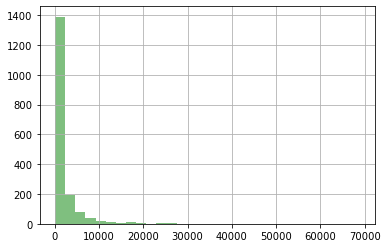

In [16]:
# store의 이용빈도를 hist그래프로 빈도수를 파악한다. 

fred1.hist(bins=30, color='green', alpha=0.5)
plt.show()

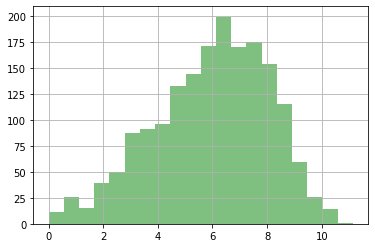

In [17]:
# 값이 너무 치우쳐져 있기때문에 log를 사용해서 값들을 비율적으로 낮춰줬다.

fred1_log = np.log(fred1)
fred1_log.hist(bins = 20, color='green', alpha=0.5)
plt.show()

In [18]:
# 값들의 대략적인 수치 정보 파악
# 가게의 평균 판매 개수는 1894개이다.
fred1.describe()

count     1775.00
mean      1894.53
std       4056.02
min          1.00
25%        102.50
50%        492.00
75%       1940.00
max      68773.00
Name: store_id, dtype: float64

In [19]:
# 가장 손님이 많았던 가게 10군데의 id

fred1.sort_values(ascending=False)

0       68773
753     39318
105     36063
1342    33335
428     33285
        ...  
608         1
201         1
951         1
727         1
632         1
Name: store_id, Length: 1775, dtype: int64

In [20]:
df.head(4)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12
3,0,8b4f9e0e95,66,1.0,0,0,12,12


In [21]:
# 총 922522 명의 카드가 인식되었다.
df['card_id'].nunique()

922522

In [22]:
# df에 card_id의 빈도수를 파악하는데 top10을 매겨본다

fred2 = df['card_id'].value_counts()
fred2[:10]

53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
10a5c30cda    425
06e61d93b8    423
5cf0b23473    413
0177959e09    409
a9a1e3d97d    405
Name: card_id, dtype: int64

In [23]:
# card_id의 count로 describe를 사용해 대략적인 계산 값을 얻었다.
fred2.describe()

count    922522.00
mean          3.65
std           6.93
min           1.00
25%           1.00
50%           2.00
75%           4.00
max         835.00
Name: card_id, dtype: float64

In [24]:
# card_id의 빈도수중에 max값이 특출나기 때문에 확인
# card_id의 빈도수중 가장 많은 빈도로 사용한 이용자는 소량구매를 많이 하고 있다.

card_bin_max = df['card_id'] == '53817035d4'
card_bin_max = df[card_bin_max]
card_bin_max.sort_values('amount', ascending=False)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
2941611,1551,53817035d4,58,1.0,3,0,09,20
2941796,1551,53817035d4,55,1.0,2,0,09,20
2941593,1551,53817035d4,55,1.0,2,0,09,19
2941012,1551,53817035d4,52,1.0,3,0,08,20
2942301,1551,53817035d4,42,1.0,1,0,10,19
...,...,...,...,...,...,...,...,...
2946693,1551,53817035d4,4,1.0,2,0,05,08
2946742,1551,53817035d4,4,1.0,3,0,05,12
2946957,1551,53817035d4,3,1.0,6,0,05,13
2947305,1551,53817035d4,-7,1.0,6,0,06,18


<AxesSubplot:>

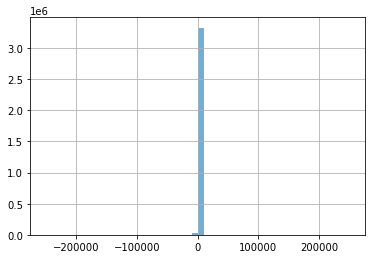

In [25]:
# 폭이 매우 커서 이 상태로는 볼 수 있는 것이 없다.
df.amount.hist(bins=50, alpha = 0.6)

In [26]:
# df.amount > 0로 식을 주면 0과 1의 값으로 반환해서 값을 넣어주기 때문에 이를 활용하여 실제로 구매를 한 비율이 얼마인지 찾을 수 있다.

ser = df.amount > 0
np.round(ser.mean(),4)

0.9896

In [27]:
df.loc[df.amount.argmax()]

store_id               370
card_id         1c492f54f0
amount              250000
installments           3.0
days_of_week             0
holyday                  0
month                   01
hour                    12
Name: 929470, dtype: object

In [28]:
max_amount_stroe_id = df['store_id'] == 370
max_amount_stroe_id = df.loc[max_amount_stroe_id]

In [29]:
# 가장 비싼 매출을 낸 가게의 매출개수는 196건이다.
max_amount_stroe_id.value_counts('store_id')

store_id
370    196
dtype: int64

In [30]:
# 환불의 비율이 몇개인지 알아보자
max_store_return = max_amount_stroe_id['amount'] < 0
round(max_store_return.mean(),4)

# 환불의 비율이 35%나 되기 때문에 이 가게에 주시해야할 필요가 있다.

0.352

In [31]:
# 가장 높은 금액을 한번에 지불한 카드id를 집중 탐색
amount_max_card_id = (df.iloc[df.amount.argmax()])['card_id']

In [32]:
# 가장 높은 금액을 지불한 사람의 거래 내역
# 거래 내역을 보니 한번에 많은 금액을 지불하고 환불 받은 것 외에는 거래 내역이 없다.
# 이상치

amount_max_custmor = df.card_id == amount_max_card_id
amount_max_custmor = df[amount_max_custmor]
amount_max_custmor

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
929470,370,1c492f54f0,250000,3.0,0,0,01,12
929473,370,1c492f54f0,-250000,3.0,0,0,03,19


In [33]:
# installments(할부개월)을 개월수별로 몇건이나 있는지 파악
fred3 = df['installments'].value_counts()
fred3

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

In [34]:
    # 다시 sort_values를 써서 fred3를 재배열해준다.
    fred3.sort_values(ascending=False)

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

<AxesSubplot:>

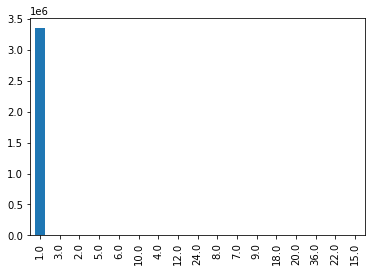

In [35]:
# 해당 그래프에는 1밖에 보이지 않기 때문에 1을 제외하고 구해준다.
fred3.plot(kind='bar')

3.0     10686
2.0      3431
5.0      1220
6.0       647
10.0      252
4.0       209
12.0      206
24.0       96
8.0        32
7.0        28
9.0        25
18.0       11
20.0        6
36.0        5
22.0        4
15.0        2
Name: installments, dtype: int64


<AxesSubplot:>

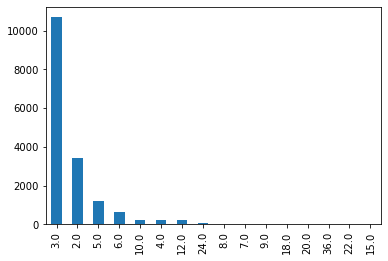

In [36]:
# 1개월을 제외하면 3개월이 가장 많은 빈도수를 차지한다.

fred3_1 = fred3.iloc[1:]
print(fred3_1)
fred3_1.plot.bar()


나중에 두 개의 변수를 사용할 때 installments과 amount로 해봐야겠다.

days_of_week 변수를 파악

In [37]:
df.head(3)
df_10 = df.iloc[:10]

In [38]:
# df의 days_of_week만 가져와서 value_counts()를 사용해서 요일별 결제 건수를 파악
fred4 = df['days_of_week'].value_counts()
fred4

5    533093
4    511031
3    472820
2    471573
1    467276
6    462156
0    444847
Name: days_of_week, dtype: int64

In [39]:
# fred4를 sort_index()를 사용해서 요일별로 정렬해준다.
fred4 = fred4.sort_index()
fred4

0    444847
1    467276
2    471573
3    472820
4    511031
5    533093
6    462156
Name: days_of_week, dtype: int64

<AxesSubplot:>

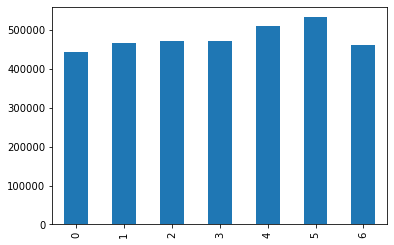

In [40]:
fred4.plot.bar()

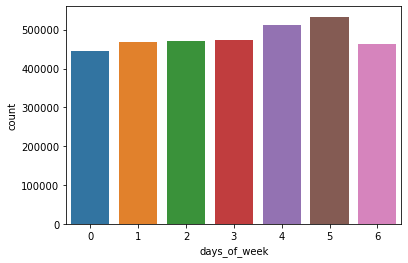

In [41]:
# seaborn에 있는 countplot을 사용하면 x값을 넣어줘서 count의 개수를 구한다.
sns.countplot(data=df, x='days_of_week')
plt.show()

holyday 변수에 관한 분석

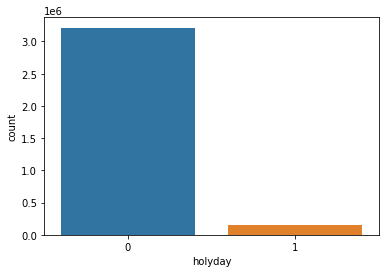

In [42]:
sns.countplot(data=df, x='holyday')
plt.show()

In [44]:
df_holyday_0 = df['holyday'] == 0
df_holyday_1 = df['holyday'] == 1

print(df_holyday_0.sum(), df_holyday_1.sum())

3213781 149015


In [46]:
df.head(3)

,store_id,card_id,amount,installments,days_of_week,holyday,month,hour
0,0,d297bba73f,5,1.0,2,0,12,18
1,0,d297bba73f,-5,1.0,2,0,12,18
2,0,0880849c05,144,1.0,0,0,12,12


month에 대한 분석

In [56]:
df['month'].unique()
fred5 = df['month'].value_counts()
fred5 = fred5.sort_index()
fred5 # month별 count개수

01    258378
02    250079
03    310753
04    318366
05    331971
06    332230
07    334019
08    237922
09    240458
10    244391
11    239853
12    264376
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

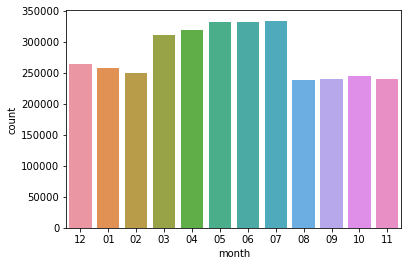

In [50]:
sns.countplot(data=df, x='month')

hour에 대한 분석

In [63]:
df['hour']
temp = df['hour'].unique()
temp.sort()
temp # 00~23으로 시간을 표시함

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [ ]:
fred6 = df['hour'].value_counts()
fred6 = fred6.sort_index()
fred6 # 시간대 별로 결제 횟수가 얼마인지 & 정렬까지

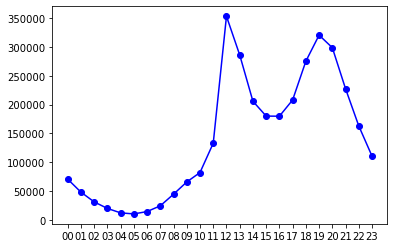

In [92]:
plt.plot(temp,fred6,'b-o')
plt.show()
# 시간대 별 결제 횟수 시각화

두개의 column을 묶어서 분석